In [1]:
# Try working with SVM by scikit 
# Ali Babolhavaeji   7/4/2019

import matplotlib.pyplot as plt 
import numpy as np 

#from scipy import stats

#import seaborn as sns; sns.set()3.5
# Import standad dataSet and plot it 
from sklearn.datasets.samples_generator import make_blobs
X,y=make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)


(-1, 3.5)

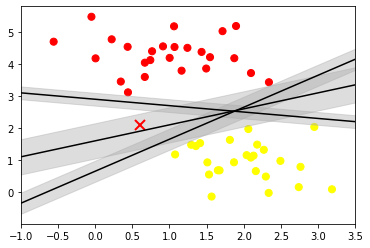

In [2]:
#Draw the lines to seprate the classes 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
xfit = np.linspace(-1, 3.5)
for m,b,d in[(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1,3.5)
#plt.show()

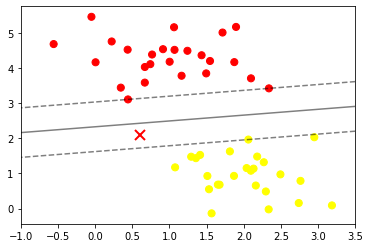

In [3]:
#Draw the lines to seprate the classes 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
xfit = np.linspace(-1, 3.5)
plt.xlim(-1,3.5)
#plt.show()

# use scikit-learn to train a SVM model and use a linear kernel for that and C will be set as a big number
from sklearn.svm import SVC  # supprot vector classifier
model=SVC(kernel='linear',C=1E10)
model.fit(X,y)

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None :
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()

    #creat grid to evaluate model
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    X,Y=np.meshgrid(x,y)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)      


plot_svc_decision_function(model);

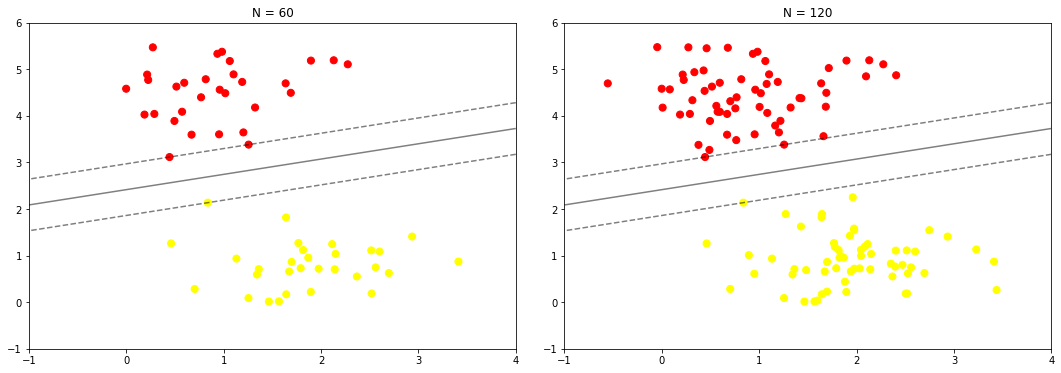

In [4]:
#several points just touch the margins--> these points are pivotal elements of this fit --> known as support vector
#in Scikit-learn you can have access to their attributes by--> support_vectors_
#plt.show()


def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))
    

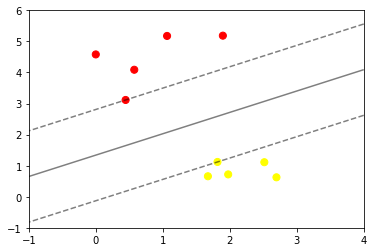

In [5]:
# This part shows that any point which is classify correctly dosn't hava any effect in the boundries and margins
#Technically, this is because these points do not contribute to the loss function used to fit the model, 
#so their position and number do not matter so long as they do not cross the margin.

from ipywidgets import interact, fixed
interact(plot_svm, N=[10,50, 200], ax=fixed(None));



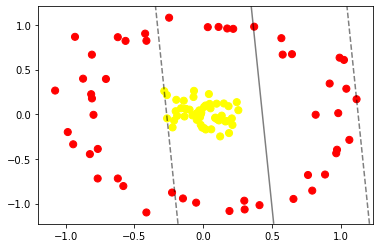

In [6]:
from sklearn.datasets.samples_generator import make_circles
X,y= make_circles(100, factor=.1,noise=.1)
clf=SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)



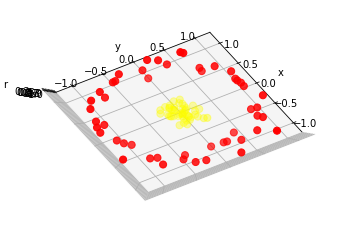

In [7]:
r = np.exp(-(X ** 2).sum(1))

from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90,-45,0,45,90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

/home/ali/.conda/envs/py37/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


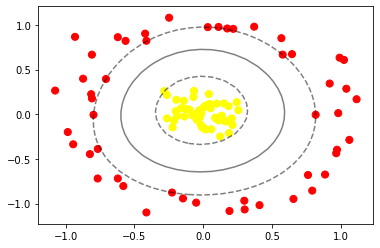

In [8]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');


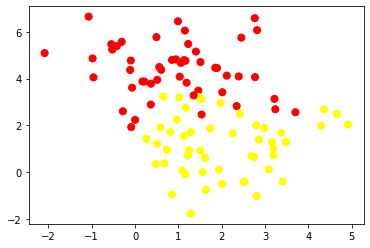

In [9]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');


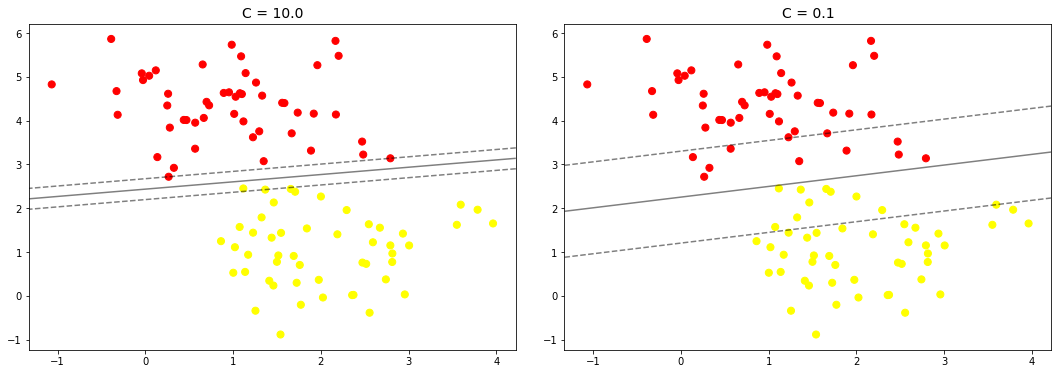

In [10]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [11]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


/home/ali/.conda/envs/py37/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


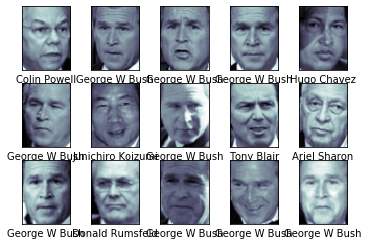

In [12]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [13]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca=RandomizedPCA(n_components=150, whiten=True
                 ,random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced' )
model=make_pipeline(pca,svc)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)




/home/ali/.conda/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 1min 13s, sys: 1.68 s, total: 1min 15s
Wall time: 12.6 s
{'svc__C': 10, 'svc__gamma': 0.001}


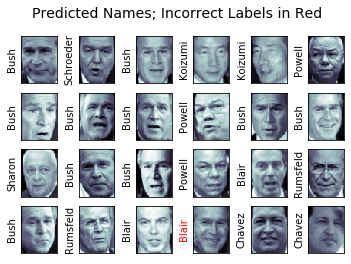

In [14]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [15]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



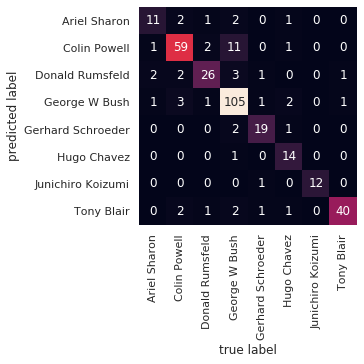

In [16]:
# use seaborn plotting defaults
import seaborn as sns; sns.set()# use seaborn plotting defaults

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');